#Data Collection

In [ ]:
import pandas as pd

url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"

df = pd.read_csv(url)

#Data Preprocessing

In [ ]:
df.dropna(inplace=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

#Exploratory Data Analysis (EDA)

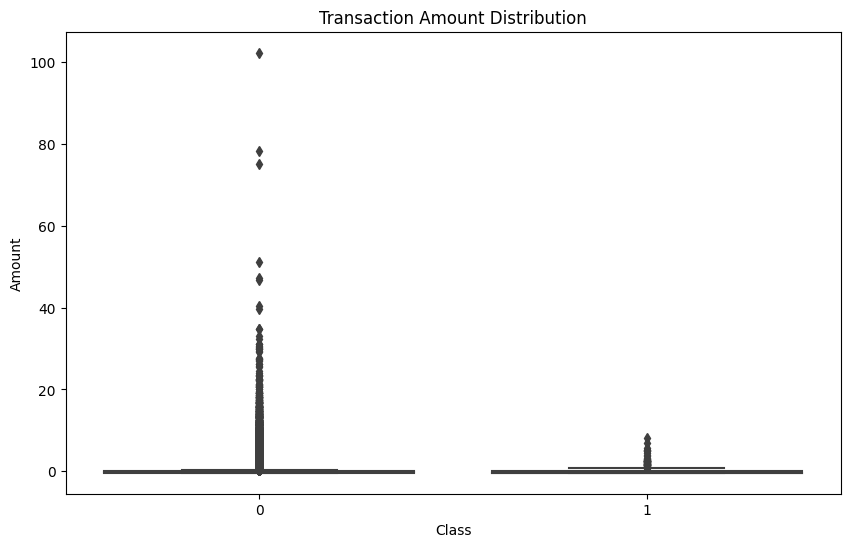

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount Distribution')
plt.show()


#Feature Engineering

In [ ]:
df['Hour'] = df['Time'] // 3600

#Model Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42,n_estimators=50)

#Model Training

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

#Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_


#Model Evaluation

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_valid)

report = classification_report(y_valid, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



#Validation and Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
mean_cv_accuracy = cv_scores.mean()
print(mean_cv_accuracy)

0.8005828382928597


#ROC Curve

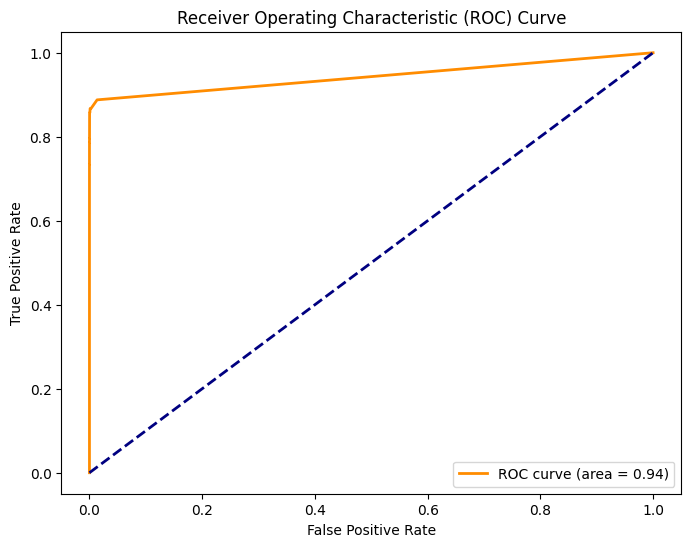

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_valid, model.predict_proba(X_valid)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


#Precision-Recall Curve

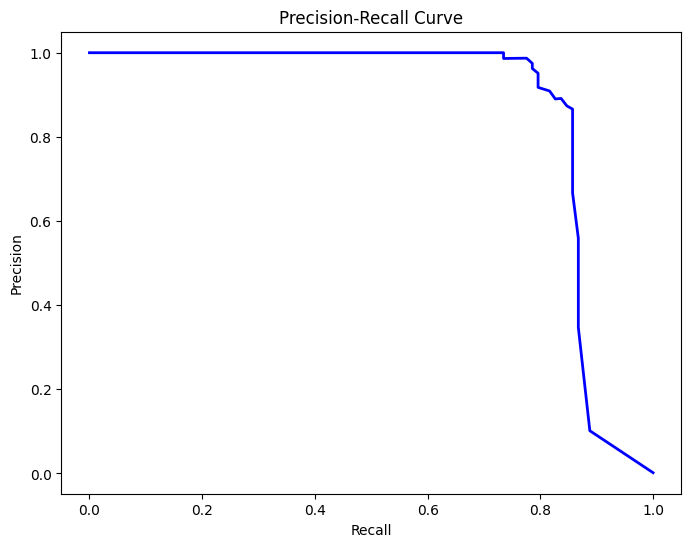

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_valid, model.predict_proba(X_valid)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


#Confusion Matrix

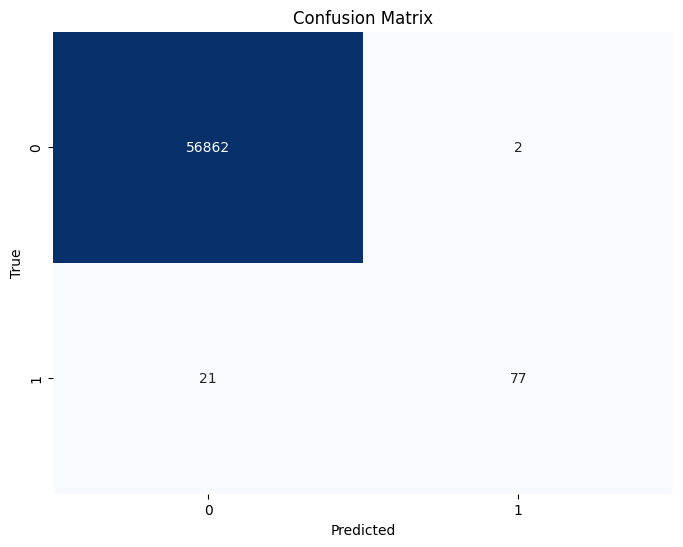

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_valid, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#Feature Importance

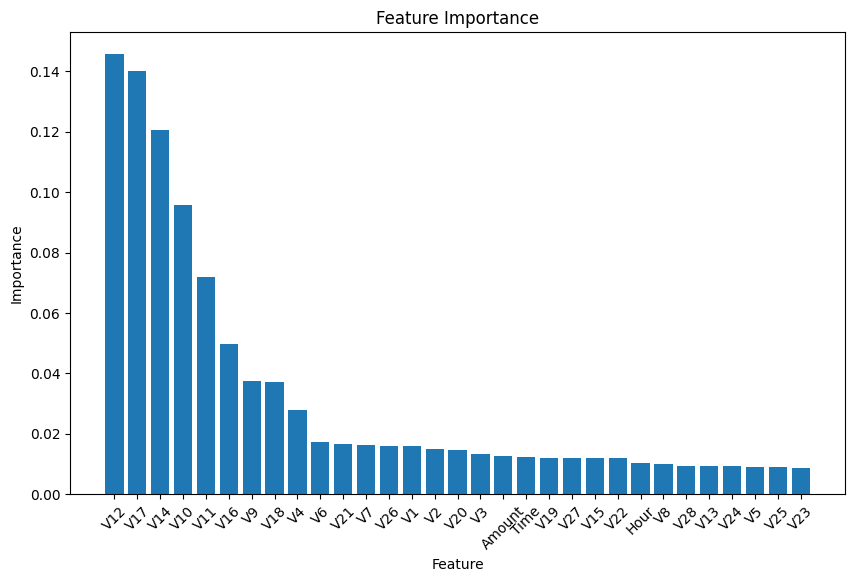

In [ ]:
feature_importance = model.feature_importances_

sorted_idx = feature_importance.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importance[sorted_idx], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_idx], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

#Actual vs Predicted Values

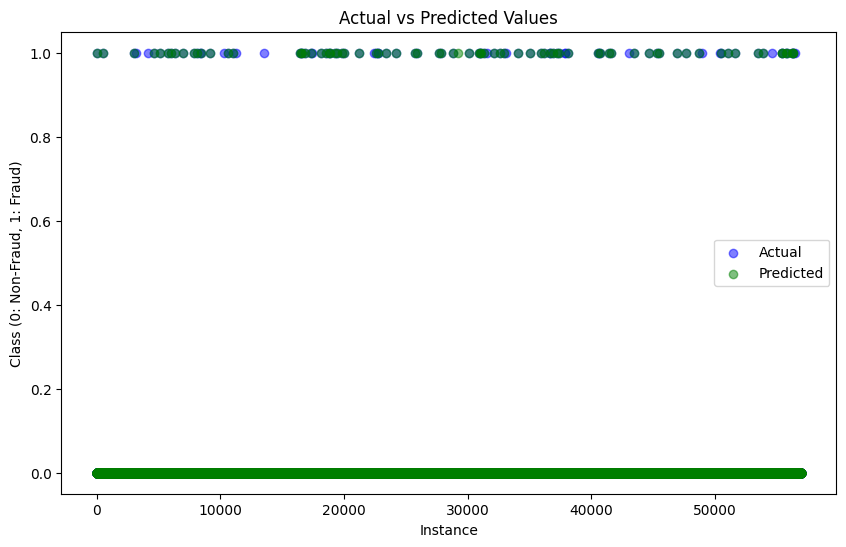

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_valid)), y_valid, color='blue', label='Actual', alpha=0.5)
plt.scatter(range(len(y_valid)), y_pred, color='green', label='Predicted', alpha=0.5)
plt.xlabel('Instance')
plt.ylabel('Class (0: Non-Fraud, 1: Fraud)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

#Actual vs Predicted Values with Prediction Model Line

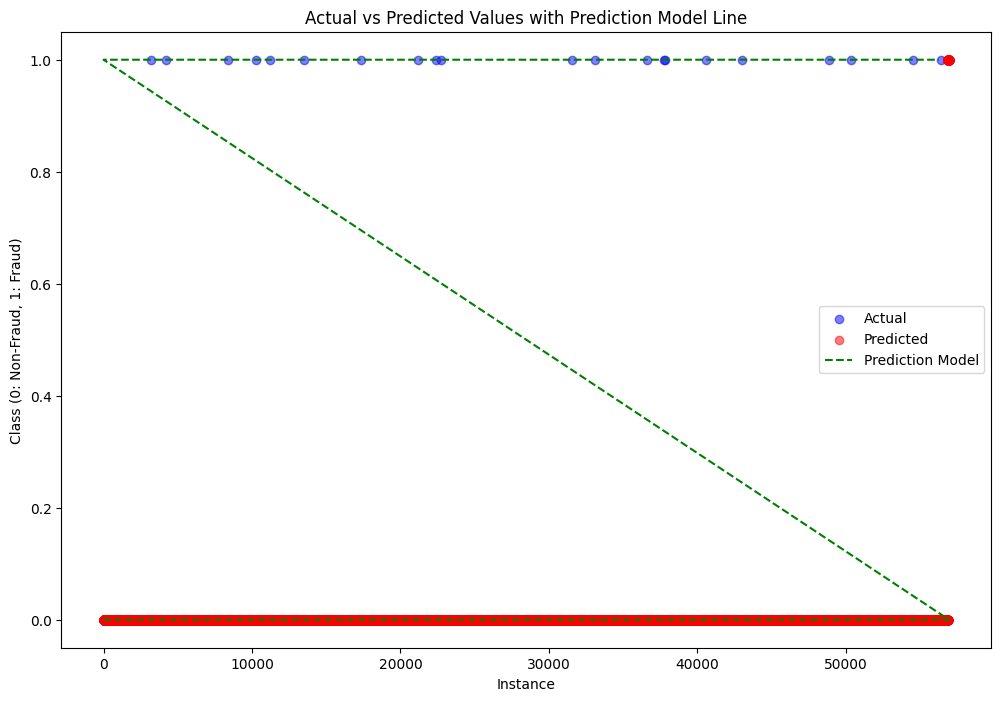

In [ ]:
sorted_indices = sorted(range(len(y_pred)), key=lambda k: y_pred[k])

sorted_actual = [y_valid.iloc[i] for i in sorted_indices]
sorted_predicted = sorted(y_pred)

plt.figure(figsize=(12, 8))
plt.scatter(range(len(y_valid)), sorted_actual, color='blue', label='Actual', alpha=0.5)
plt.scatter(range(len(y_valid)), sorted_predicted, color='red', label='Predicted', alpha=0.5)
plt.plot(sorted_indices, sorted_predicted, color='green', linestyle='--', label='Prediction Model')
plt.xlabel('Instance')
plt.ylabel('Class (0: Non-Fraud, 1: Fraud)')
plt.title('Actual vs Predicted Values with Prediction Model Line')
plt.legend()
plt.show()

#Learning Curves

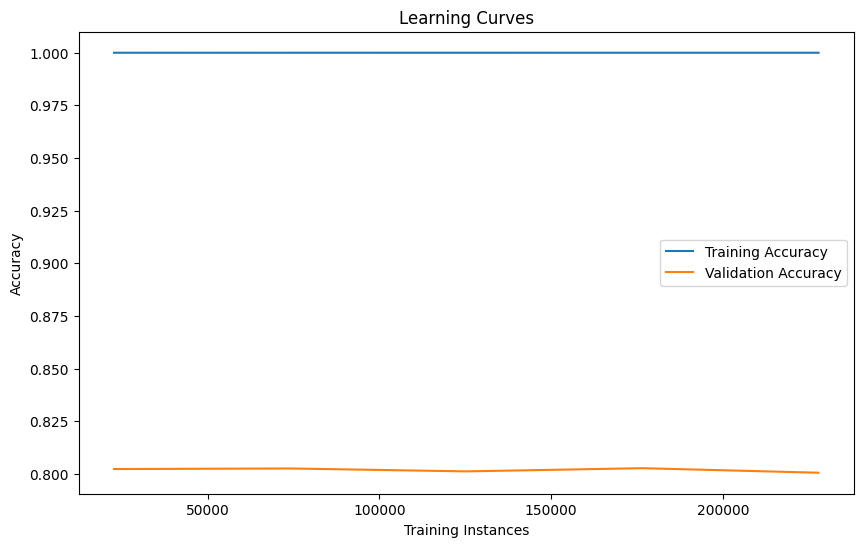

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(model, X, y, cv=5, scoring='accuracy')

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Accuracy')
plt.plot(train_sizes, valid_scores.mean(axis=1), label='Validation Accuracy')
plt.xlabel('Training Instances')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()


In [ ]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 5.8 MB/s eta 0:00:00


#SHAP Values or Feature Importance Plot

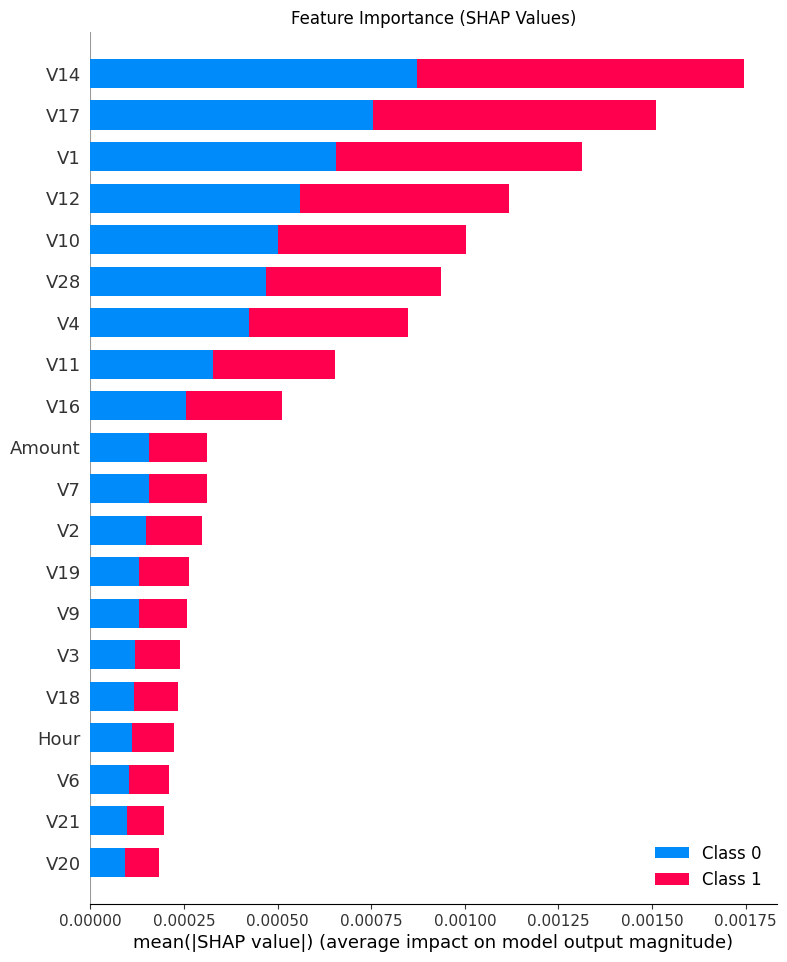

In [ ]:
import shap

explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_valid)

shap.summary_plot(shap_values, X_valid, plot_type='bar', show=False)
plt.title('Feature Importance (SHAP Values)')
plt.show()
